<a href="https://colab.research.google.com/github/martinaluyten/Analysis-of-Big-Data-in-Physics/blob/main/Gravitational_wave_data_analysis_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravitational wave data analysis: horizon distance of detectors

# Assignment 3

In [ ]:
import sys
!{sys.executable} -m pip install lalsuite pycbc

In [21]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate, inverse_spectrum_truncation
from pycbc.catalog import Merger
import pylab
from pycbc.types import  FrequencySeries, TimeSeries

from scipy import interpolate

import numpy as np
from pycbc import frame
import pycbc
from pycbc.filter import resample_to_delta_t, highpass
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm 
from pycbc.detector import Detector
from scipy.interpolate import interp1d

import numpy as np

from pycbc.waveform import td_approximants, fd_approximants
import pylab
from pycbc import types 
from pycbc.filter import matched_filter
from pycbc.waveform import get_td_waveform
from pycbc.conversions import mass1_from_mchirp_q

**horizon distance for advanced LIGO detector**

In [40]:
#getting the psd of the detector ‘aLIGO’ 
import pycbc.psd
flow=4 # set up the lower cut off frequency
delta_f=1/16
flen=int(2048/(delta_f))+1
psd=pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd.data[:int(flow/delta_f)]=np.inf #set the value outside the frequency range to infinity
psd.data[-1] = np.inf

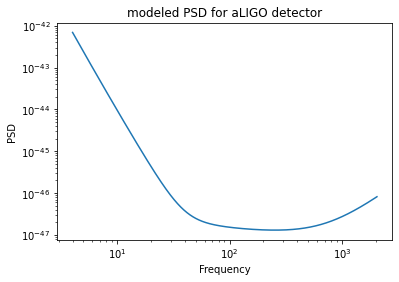

In [43]:
pylab.loglog(psd.sample_frequencies, psd)
pylab.xlabel("Frequency")
pylab.ylabel("PSD")
pylab.title("modeled PSD for aLIGO detector")
pylab.show()

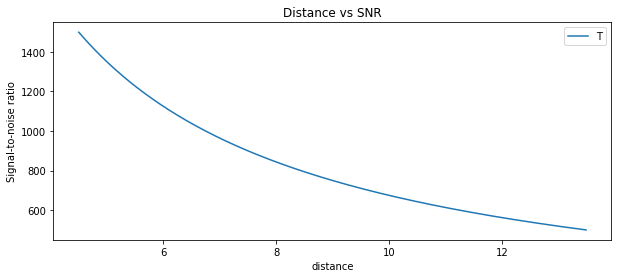

In [44]:
#estimate horizon distance for aLIGO by estimating the distance at which the value of SNR will be 8

sample_rate = 2048
distance = np.arange(500, 1500, 1)

#generating waveforms
snr_list=[]
for d in distance:
  hp,hc=get_fd_waveform(approximant="TaylorF2",
                        mass1=3,mass2=3,
                        delta_f=delta_f,
                        distance=d,
                        f_lower=4)
  
  snr=(pycbc.filter.sigmasq(hp,psd))**0.5
  snr_list.append(snr)


pylab.figure(figsize=[10,4])
pylab.plot(snr_list,distance,label='snr')
pylab.legend('True')
pylab.ylabel('Signal-to-noise ratio')
pylab.xlabel('distance')
pylab.title('Distance vs SNR')
pylab.show()



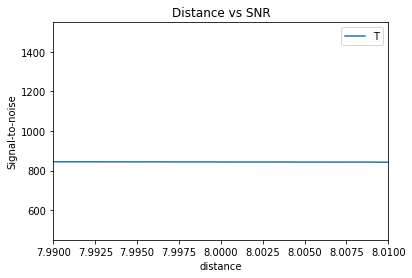

In [45]:
#zooming in to find exact distance
pylab.plot(snr_list,distance,label='snr')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('distance')
pylab.title('Distance vs SNR')
#pylab.ylim(830,880)
pylab.xlim(7.99,8.01)
pylab.show()

--> SNR is 8 at a distance around 845

In [47]:
#now that the the distance is known:
#we can estimate the horizon distance for different masses assuming m1=m2
mass=np.arange(5, 500, 1)
horizontal_distance=[]
masses=[]

#generating waveforms
snr_list2=[]
for m in mass:
  hp2,hc2=get_fd_waveform(approximant="TaylorF2",
                        mass1=m,
                        mass2=m,
                        delta_f=delta_f,
                        distance=845,
                        f_lower=4)
  
  snr2=(pycbc.filter.sigmasq(hp2,psd))**0.5
  #dividing by 8 to find horizontal distance as snr=8 and D ​∝​ 1/ρ
  snr_list2.append(snr2/8)
  masses.append(m*2)
  #horizontal_distance.append(snr2/8)



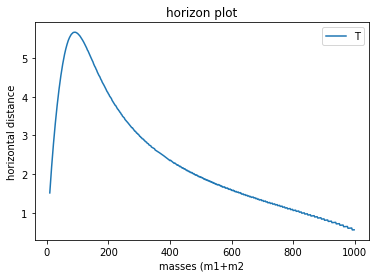

In [48]:
pylab.plot(masses,snr_list2,label='snr')
pylab.legend('True')
pylab.ylabel('horizontal distance')
pylab.xlabel('masses (m1+m2')
pylab.title('horizon plot')
pylab.show()

The graph shows two black holes starting the coalesce at time 0 and merging completely at the peak (total mass around 100solar masses)
The gravitational waves created by this disturbance then decrease until 0 right after the merging.
Therefore we can interpret from the point of view of the detector’s capability to detect GWs from the compact binary merger that the higher the total mass the less the detector detects GWs.

**Einstein Telescope**
Repeating the same process for Einstein Telescope

In [49]:
#getting the psd of the detector ‘Einstein Telescope’ 
flow=4 # set up the lower cut off frequency
delta_f=1/16
flen=int(2048/(delta_f))+1
psd = pycbc.psd.EinsteinTelescopeP1600143(flen, delta_f, flow)
psd.data[:int(flow/delta_f)]=np.inf #set the value outside the frequency range to infinity
psd.data[-1] = np.inf


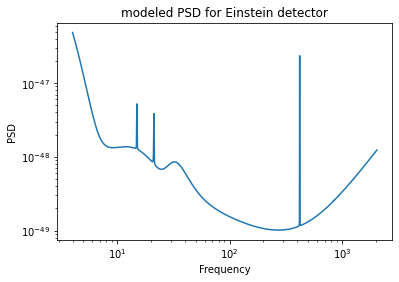

In [50]:
pylab.loglog(psd.sample_frequencies, psd)
pylab.xlabel("Frequency")
pylab.ylabel("PSD")
pylab.title("modeled PSD for Einstein detector")
pylab.show()

In [51]:
#estimate horizon distance for aLIGO by estimating the distance at which the value of SNR will be 8
sample_rate = 2048
distance = np.arange(9000, 15000, 10)
#distance arange larger as distances are larger for Einstein telescope

snr_list=[]
for d in distance:
  hp,hc=get_fd_waveform(approximant="TaylorF2",
                        mass1=3,mass2=3,
                        delta_f=delta_f,
                        distance=d,
                        f_lower=4)
  
  snr=(pycbc.filter.sigmasq(hp,psd))**0.5
  snr_list.append(snr)

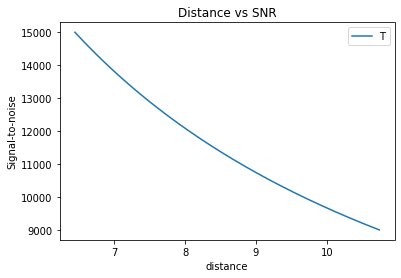

In [52]:
pylab.plot(snr_list,distance,label='snr')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('distance')
pylab.title('Distance vs SNR')
pylab.show()

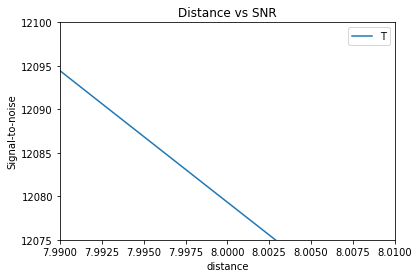

In [53]:
##zooming in to find exact distance
pylab.plot(snr_list,distance,label='snr')
pylab.legend('True')
pylab.ylabel('Signal-to-noise')
pylab.xlabel('distance')
pylab.title('Distance vs SNR')
pylab.ylim(12075,12100)
pylab.xlim(7.99,8.01)
pylab.show()

--> SNR is 8 at a distance around 12080
(distance larger for Einstein telescope)

In [54]:
#now that the the distance is known:
#we can estimate the horizon distance for different masses assuming m1=m2
mass=np.arange(5, 500, 1)
horizontal_distance=[]
masses=[]

snr_list2=[]
for m in mass:
  hp2,hc2=get_fd_waveform(approximant="TaylorF2",
                        mass1=m,
                        mass2=m,
                        delta_f=delta_f,
                        distance=12080,
                        f_lower=4)
  
  snr2=(pycbc.filter.sigmasq(hp2,psd))**0.5
  #dividing by 8 to find horizontal distance as snr=8 and D ​∝​ 1/ρ
  snr_list2.append(snr2/8)
  masses.append(m*2)
  #horizontal_distance.append(snr2/8)

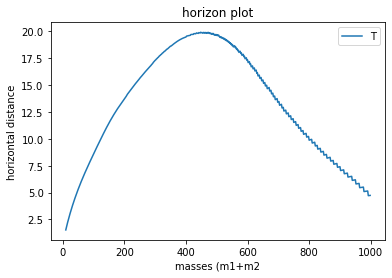

In [57]:
pylab.plot(masses,snr_list2,label='snr')
pylab.legend('True')
pylab.ylabel('horizontal distance')
pylab.xlabel('masses (m1+m2')
pylab.title('horizon plot')
pylab.show()

The graph shows two black holes starting the coalesce at time 0 and merging completely at the peak (total mass around 500solar masses)
The gravitational waves creates by this disturbance decreases until 0 right after the merging.
--> Einstein Telescope is more sensitive than aligo detector as it detects larger masses and therefore has more chances of detecting the GWs.

